<a href="https://www.kaggle.com/code/henilj7/earthquake-visulization?scriptVersionId=119460105" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imagesused/LeviImage.png
/kaggle/input/imagesused/Earthquakebg.jpg
/kaggle/input/imagesused/eren.png
/kaggle/input/imagesused/bg.jpg
/kaggle/input/imagesused/EARTHQUAKE VISULIZATON.png
/kaggle/input/imagesused/earthquake_bg.jpg
/kaggle/input/imagesused/Anime Recommendation System A content-based recommendation system that suggests anime to users based on their previous viewing habits and preferences Utilizes the textual description of anime to compute similarity .pdf
/kaggle/input/imagesused/Anime Recommendation System title.png
/kaggle/input/imagesused/ANimeTV.jpg
/kaggle/input/imagesused/Sword Art Online.jfif
/kaggle/input/imagesused/DeathNte.jpg
/kaggle/input/imagesused/eren_aot.png
/kaggle/input/imagesused/gojo.png
/kaggle/input/imagesused/levi.jpg
/kaggle/input/imagesused/Naruto.jpg
/kaggle/input/imagesused/ANIME Recommendation System.png
/kaggle/input/imagesused/deathnote.jpg
/kaggle/input/imagesused/background.jpg
/kaggle/input/imagesused/deathnote_.jpg
/kaggle/inp

In [2]:
pip install plotly

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.formula.api as smf
from PIL import Image
from IPython.display import display_html
from IPython.display import IFrame
from IPython.display import HTML
import IPython.display as display
import warnings
# Environment check
warnings.filterwarnings("ignore")

class clr:
    S ='\033[1m' + '\033[95m'
    E = '\033[0m' + '\033[38;2;49;112;143m'


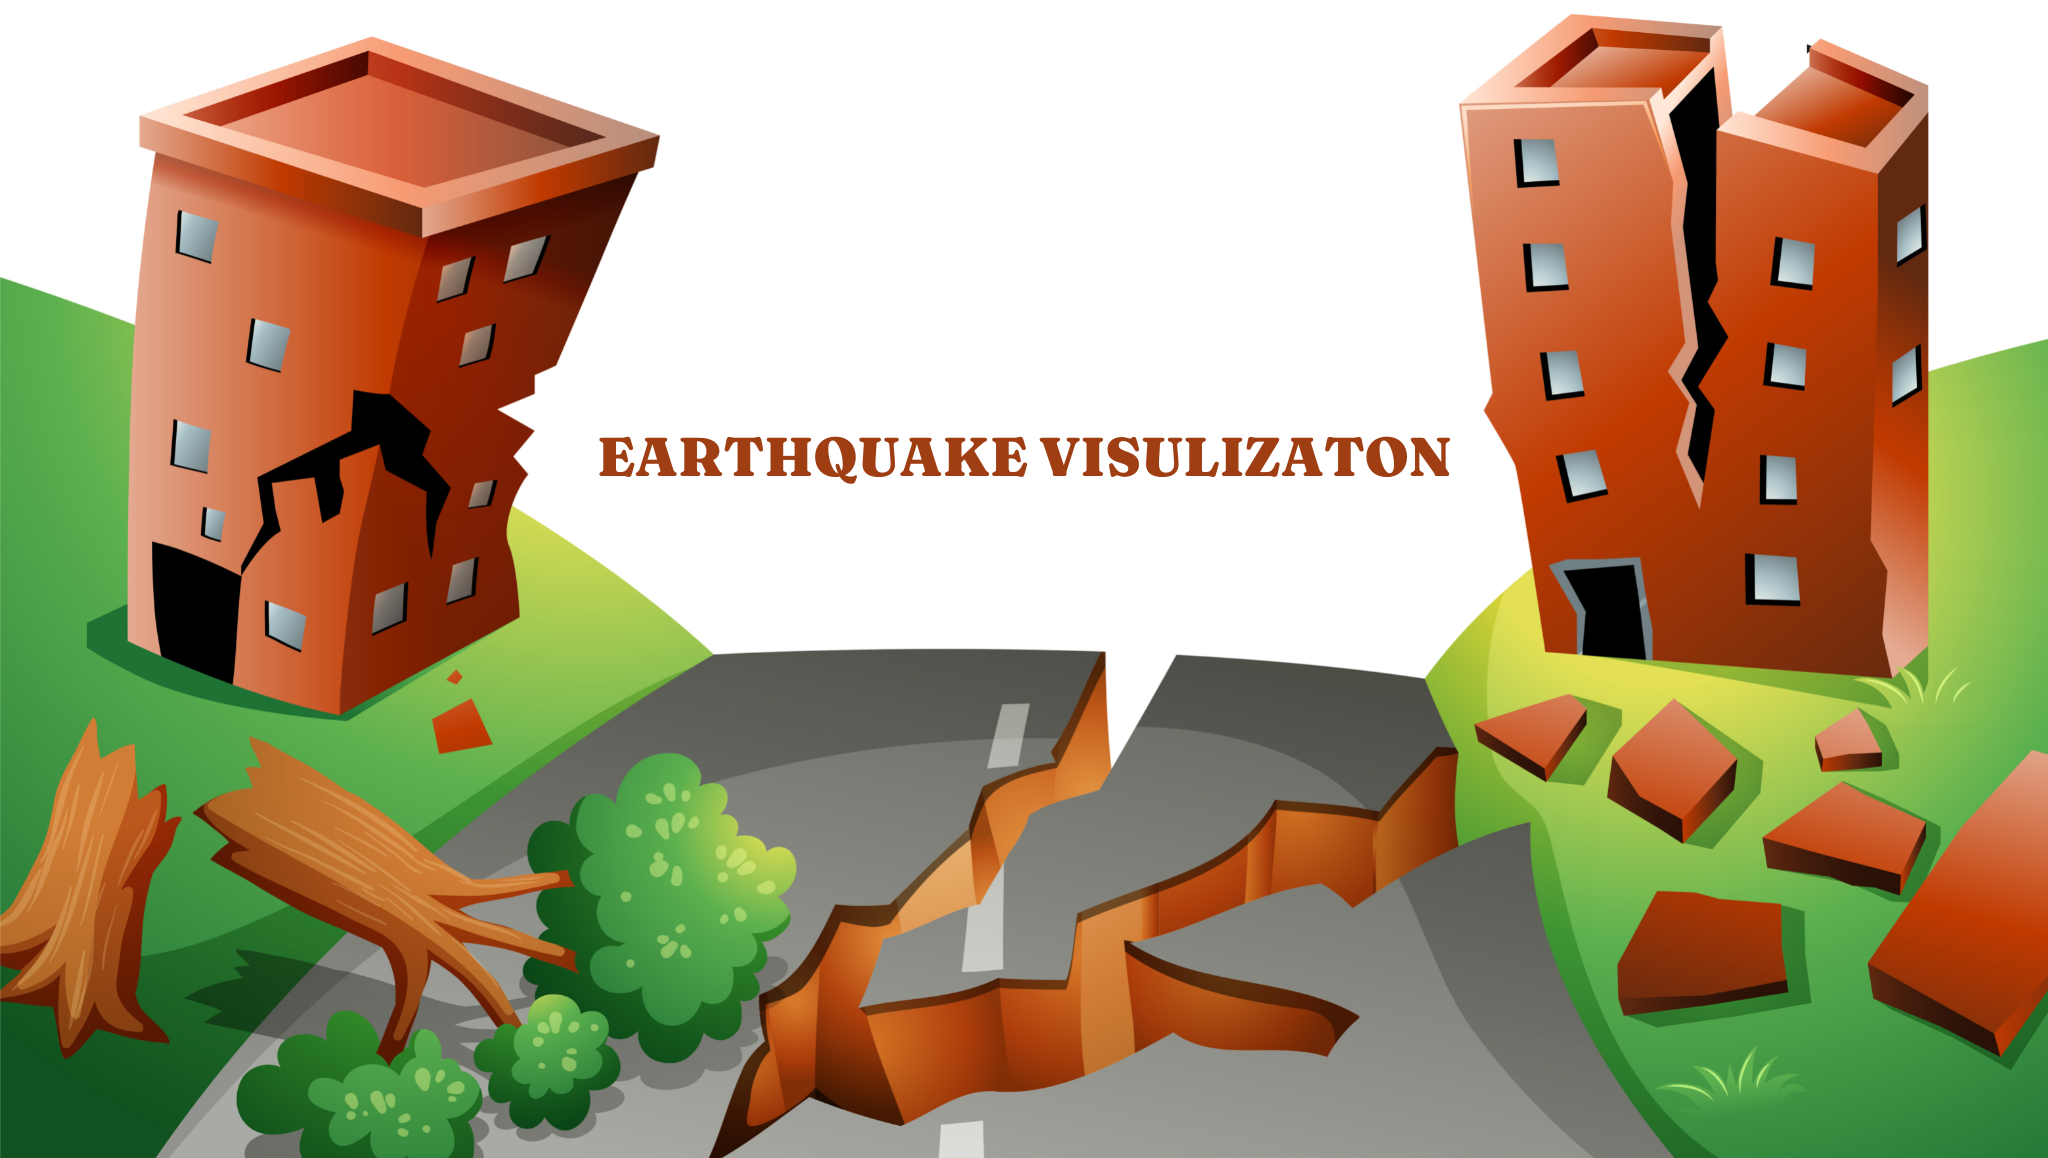

In [4]:
# Open an image
img = Image.open("/kaggle/input/imagesused/EARTHQUAKE VISULIZATON.png")

# Display the image
display.display(img)


In [5]:
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2022-01-01&endtime=2023-02-10&minmagnitude=6.0&maxmagnitude=10.0"
df1 = pd.read_csv(url)

df1.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06T12:02:11.825Z,38.0605,36.5370,10.000,6.0,mb,116.0,29,0.958,1.00,...,2023-02-16T21:13:41.161Z,"5 km NE of Göksun, Turkey",earthquake,4.40,1.811,0.027,513,reviewed,us,us
1,2023-02-06T10:26:48.486Z,38.0302,37.9636,20.094,6.0,mb,59.0,63,1.045,0.62,...,2023-02-11T19:40:16.234Z,Central Turkey,earthquake,2.91,4.649,0.084,53,reviewed,us,us
2,2023-02-06T10:24:49.258Z,38.0235,37.2030,10.000,7.5,mww,135.0,17,0.850,0.93,...,2023-02-17T10:14:02.256Z,"4 km SSE of Ekinözü, Turkey",earthquake,4.94,1.824,0.041,58,reviewed,us,us
3,2023-02-06T01:28:15.984Z,37.1784,36.9468,10.708,6.7,mww,192.0,19,0.210,0.57,...,2023-02-15T04:03:35.353Z,Central Turkey,earthquake,8.97,3.408,0.098,10,reviewed,us,us
4,2023-02-06T01:17:35.525Z,37.1662,37.0421,17.943,7.8,mww,216.0,17,0.134,0.67,...,2023-02-16T22:06:20.211Z,"27 km E of Nurda??, Turkey",earthquake,6.27,3.278,0.050,38,reviewed,us,us


In [6]:
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2022-01-01&endtime=2023-02-10&minmagnitude=4.0&maxmagnitude=6.0"

df2 = pd.read_csv(url)

df2.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-09T22:25:06.440Z,-26.6367,-178.2220,264.778,4.9,mb,66.0,51.0,2.629,0.54,...,2023-02-09T22:51:03.040Z,south of the Fiji Islands,earthquake,9.31,6.734,0.049,133.0,reviewed,us,us
1,2023-02-09T22:06:39.722Z,36.9692,36.6923,10.000,4.2,mb,58.0,68.0,0.461,1.09,...,2023-02-09T22:31:50.040Z,"21 km SE of Hasanbeyli, Turkey",earthquake,4.63,1.680,0.101,27.0,reviewed,us,us
2,2023-02-09T21:46:29.575Z,37.1667,36.8266,10.000,4.1,mb,39.0,84.0,0.306,0.52,...,2023-02-09T22:20:29.040Z,Central Turkey,earthquake,4.34,1.718,0.151,12.0,reviewed,us,us
3,2023-02-09T21:20:49.025Z,-55.6193,-27.0447,10.000,5.0,mb,57.0,54.0,5.605,0.48,...,2023-02-09T21:39:50.040Z,South Sandwich Islands region,earthquake,11.44,1.886,0.075,56.0,reviewed,us,us
4,2023-02-09T21:12:19.743Z,-1.2376,67.5366,10.000,5.5,mww,53.0,50.0,5.722,0.98,...,2023-02-14T14:31:35.223Z,Carlsberg Ridge,earthquake,5.45,1.884,0.062,25.0,reviewed,us,us


In [7]:
df = pd.concat([df1, df2], ignore_index=True)

In [8]:
print("\n",clr.S+"Column after concate:"+clr.E, df.columns)


 Column after concate: Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


In [9]:
# convert 'time' column to datetime type
df['time'] = pd.to_datetime(df['time'])

# extract date from 'time' column and create a new 'date' column
df['date'] = df['time'].dt.date

# extract time from 'time' column and remove'date' from 'time' column
df['timer']=df['time'].dt.time


In [10]:
print("\n",clr.S+"After adding date and timer column let's look the dataframe:"+clr.E,)
df.head()


 After adding date and timer column let's look the dataframe:


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date,timer
0,2023-02-06 12:02:11.825000+00:00,38.0605,36.5370,10.000,6.0,mb,116.0,29.0,0.958,1.00,...,earthquake,4.40,1.811,0.027,513.0,reviewed,us,us,2023-02-06,12:02:11.825000
1,2023-02-06 10:26:48.486000+00:00,38.0302,37.9636,20.094,6.0,mb,59.0,63.0,1.045,0.62,...,earthquake,2.91,4.649,0.084,53.0,reviewed,us,us,2023-02-06,10:26:48.486000
2,2023-02-06 10:24:49.258000+00:00,38.0235,37.2030,10.000,7.5,mww,135.0,17.0,0.850,0.93,...,earthquake,4.94,1.824,0.041,58.0,reviewed,us,us,2023-02-06,10:24:49.258000
3,2023-02-06 01:28:15.984000+00:00,37.1784,36.9468,10.708,6.7,mww,192.0,19.0,0.210,0.57,...,earthquake,8.97,3.408,0.098,10.0,reviewed,us,us,2023-02-06,01:28:15.984000
4,2023-02-06 01:17:35.525000+00:00,37.1662,37.0421,17.943,7.8,mww,216.0,17.0,0.134,0.67,...,earthquake,6.27,3.278,0.050,38.0,reviewed,us,us,2023-02-06,01:17:35.525000


<a id="1"></a> <br>
# Finding Missing Values

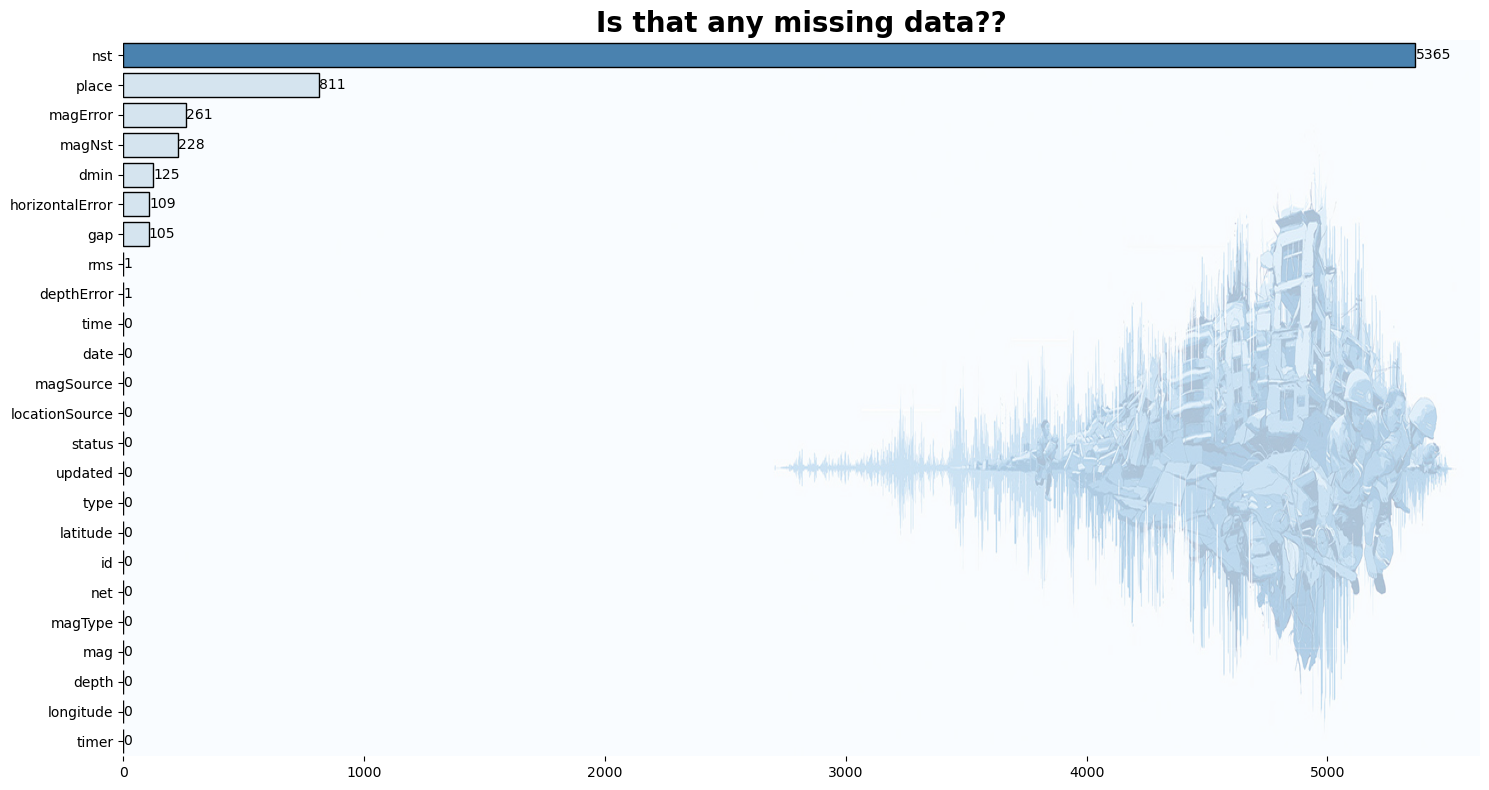

In [11]:
missing_values = df.isna().sum().sort_values(ascending=False)

# color for top value different from rest
colors = ['#D1E4F3' if x!=max(missing_values.values) else '#3984C0' for x in missing_values.values]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
plt.title("Is that any missing data??", size=20, weight="bold")
sns.barplot(x=missing_values.values, y=missing_values.index,palette=colors,edgecolor="black")
plt.xlabel("", size=15)
plt.ylabel("", size=15)


# add background image
bk_image = mpimg.imread("/kaggle/input/imagesused/Earthquakebg.jpg")

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(bk_image, zorder=0, extent=[x0, x1, y0, y1], alpha=0.35, aspect='auto')


# for showing value on chart int format
for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,p.get_y() + p.get_height() / 2, 
            '{:.0f}'.format(width), 
            ha = 'left',   
            va = 'center',size=10)
sns.despine(left=True,bottom=True);
plt.tight_layout()
plt.show()


In [12]:
df = df.drop("nst", axis='columns')

In [13]:
df.dropna(subset=['place','magError','magNst','dmin','horizontalError','gap'], inplace=True)

In [14]:
print("\n",clr.S+"After Dropping:"+clr.E, df.shape)



 After Dropping: (16357, 23)


In [15]:
# Remove the features with object data type
df1 = df.select_dtypes(exclude=['object','datetime64[ns, UTC]'])

# Split the data into training and testing datasets
train_data, test_data, train_target, test_target = train_test_split(df1.drop('mag', axis=1), df['mag'], test_size=0.3)

# Train the model
model = RandomForestRegressor()
model.fit(train_data, train_target)

# Predict on the test data
predictions = model.predict(test_data)

# Calculate the mean squared error
mse = mean_squared_error(test_target, predictions)

print("\n",clr.S+"Mean Squared Error:"+clr.E, mse)


 Mean Squared Error: 0.03661366002840593


In [16]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['latitude', 'longitude', 'depth', 'mag', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magNst']], df['mag'], test_size=0.2, random_state=0)

# Train the random forest regressor on the training data
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Predict the magnitude of earthquakes in the test set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("\n",clr.S+"Mean Absolute Error:"+clr.E, mae)
# Evaluate the performance of the model using R-squared score
r2 = rf.score(X_test, y_test)
print("\n",clr.S+"R-squared Score:"+clr.E, r2)



 Mean Absolute Error: 6.374397862934908e-05

 R-squared Score: 0.9999771090190194


# Data Visulization

In [17]:
visulization_df=df.copy()

<a id="2"></a> <br>
# Earthquake by magnitude


* magnitude trends: By plotting the magnitude of earthquakes over time, trends in earthquake activity and their severity could be revealed

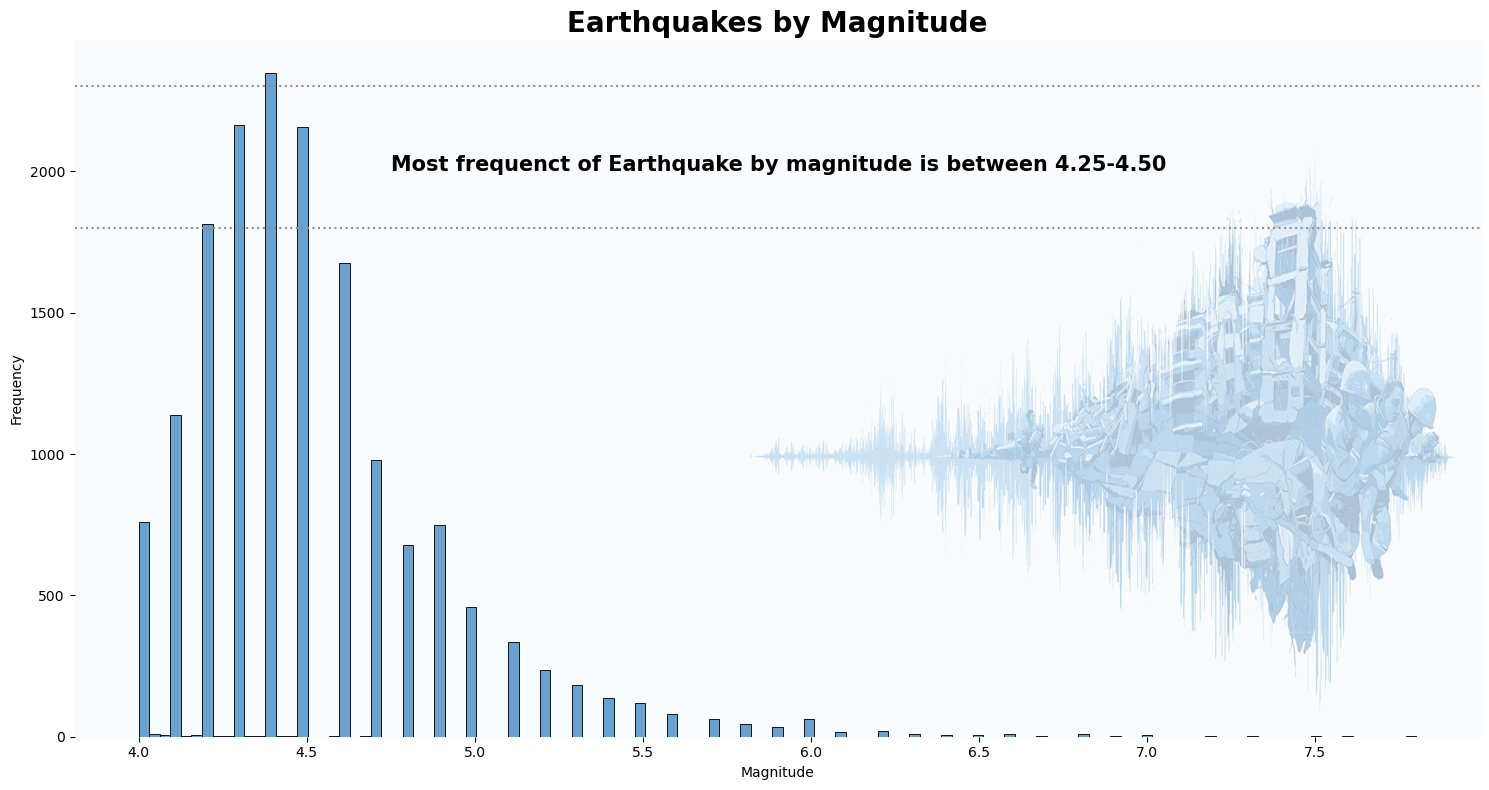

In [18]:
# Create the histogram of earthquake magnitudes
fig, ax = plt.subplots(figsize=(15, 8))
# plt.hist(df['mag'], bins=30, color='red')
sns.histplot(visulization_df['mag'], color='#3984C0')
plt.xlabel("Magnitude")
plt.ylabel("Frequency")

plt.title("Earthquakes by Magnitude", size=20, weight="bold")
# add background image
bk_image = mpimg.imread("/kaggle/input/imagesused/Earthquakebg.jpg")

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(bk_image, zorder=0, extent=[x0, x1, y0, y1], alpha=0.35, aspect='auto')

plt.axhline(y = 1800, color = '#928D8C', linestyle = ':', label = "blue line")

plt.text(x=4.75, y=2000, s="Most frequenct of Earthquake by magnitude is between 4.25-4.50", fontweight='bold',
         color='black', size=15)

plt.axhline(y = 2300, color = '#928D8C', linestyle = ':', label = "blue line")
sns.despine(left=True,bottom=True);
plt.tight_layout()
plt.show()


<a id="3"></a> <br>
# Identify season trend

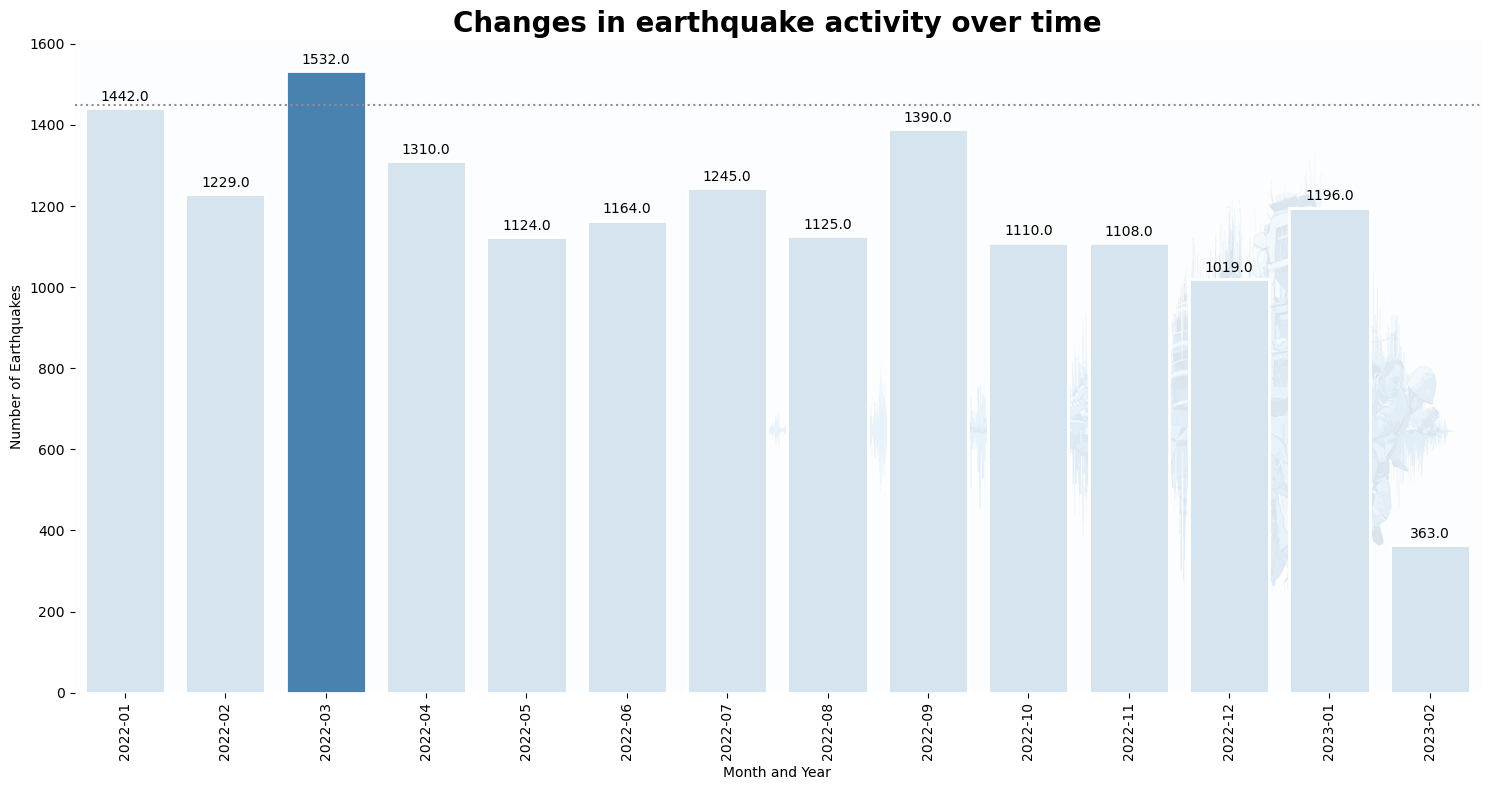

In [19]:
# Convert the date column to a datetime object
visulization_df['date'] = pd.to_datetime(visulization_df['date'])

# Create a new column that only contains the year and month of each earthquake
visulization_df['month_year'] = visulization_df['date'].apply(lambda x: x.strftime('%Y-%m'))

# # Filter the data to exclude February 2023
# df = df[df['month_year'] != '2023-02']

# Group the data by the month and year and count the number of earthquakes in each group
monthly_counts = visulization_df.groupby(['month_year']).size().reset_index(name='counts')

# color for top value different from rest
colors = ['#D1E4F3' if x!=max(monthly_counts['counts']) else '#3984C0' for x in monthly_counts['counts']]



# Plot the number of earthquakes over time
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=monthly_counts['month_year'].values, y=monthly_counts['counts'],palette=colors, edgecolor="white",linewidth=2)
plt.xlabel('Month and Year')
plt.ylabel('Number of Earthquakes')
plt.title('Changes in earthquake activity over time', size=20, weight="bold")
plt.xticks(rotation=90)


# add background image
bk_image = mpimg.imread("/kaggle/input/imagesused/Earthquakebg.jpg")
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(bk_image, zorder=0, extent=[x0, x1, y0, y1], alpha=0.15, aspect='auto')

# for showing value on chart int format
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',size=10)
    
    

plt.axhline(y = 1450, color = '#928D8C', linestyle = ':', label = "blue line")

sns.despine(left=True,bottom=True);
plt.tight_layout()
plt.show()

<a id="4"></a> <br>
# Depth Analysis: 


* By visualizing the depth of earthquakes, the distribution of shallow vs. deep earthquakes could be analyzed and compared, providing insight into the underlying tectonic processes

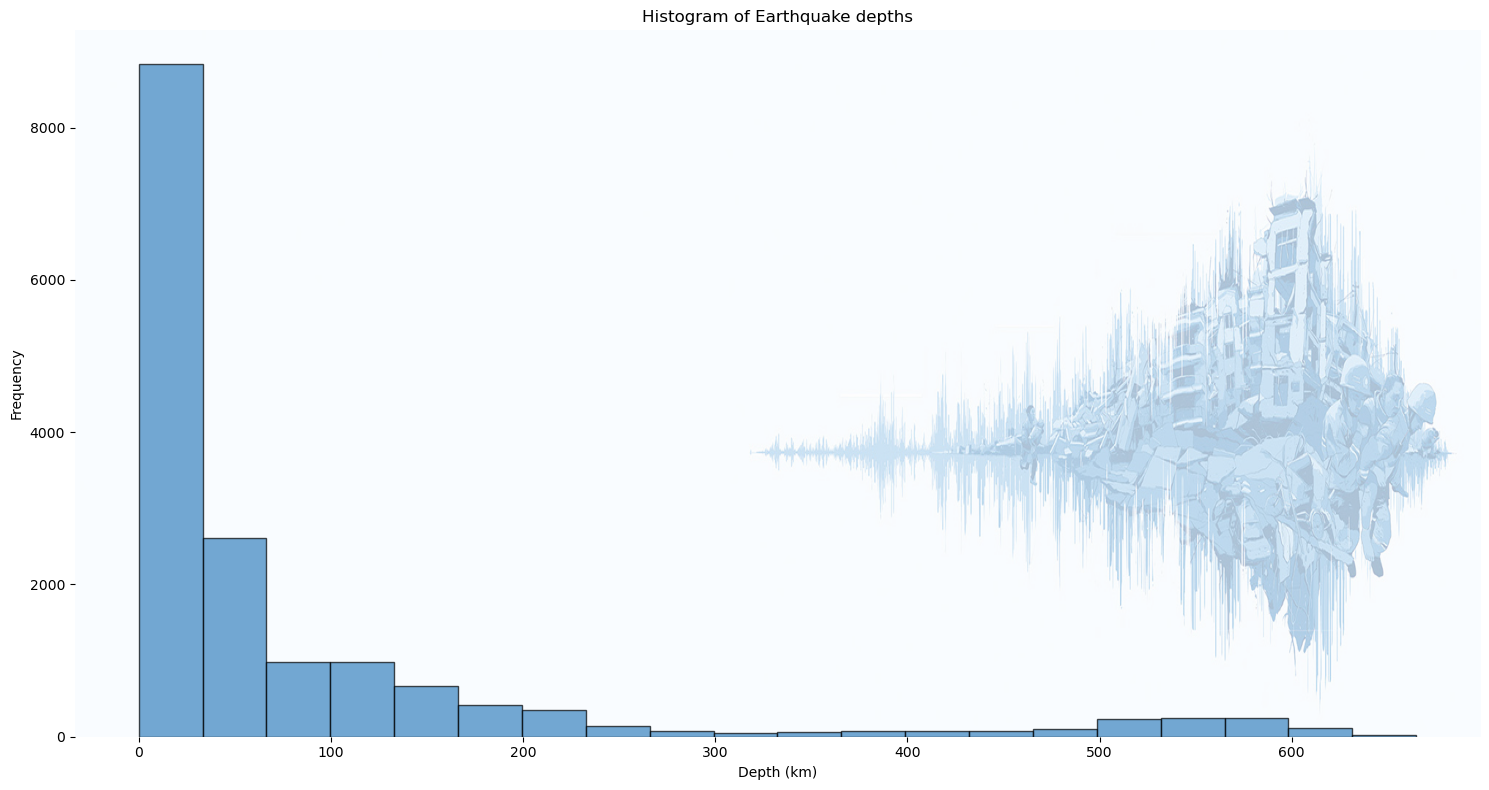

In [20]:
# Create the histogram of earthquake magnitudes
fig, ax = plt.subplots(figsize=(15, 8))
# Plot the histogram of earthquake depths
plt.hist(visulization_df['depth'], bins=20, color='#3984C0', edgecolor='black', alpha=0.7)
# add background image
bk_image = mpimg.imread("/kaggle/input/imagesused/Earthquakebg.jpg")
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(bk_image, zorder=0, extent=[x0, x1, y0, y1], alpha=0.35, aspect='auto')
# Add labels and title to the histogram
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Earthquake depths')
sns.despine(left=True,bottom=True);
plt.tight_layout()
# Show the plot
plt.show()



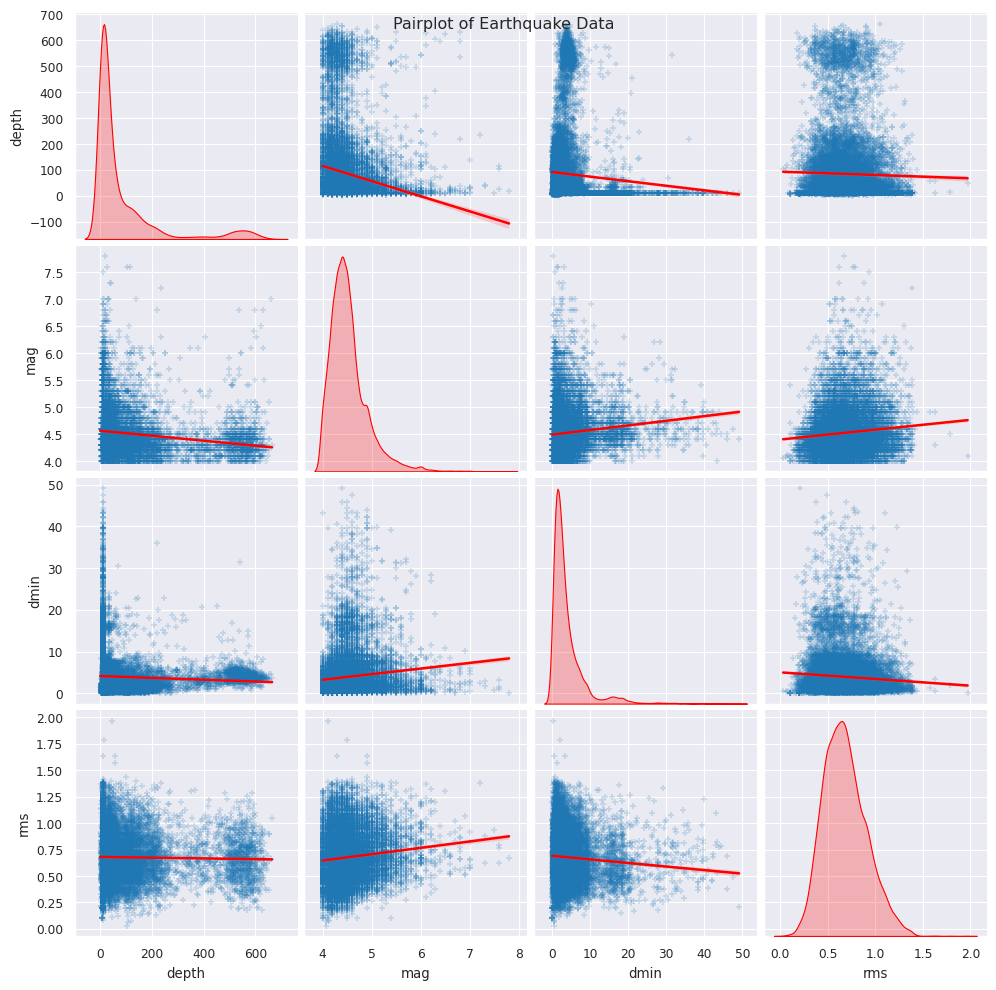

In [21]:
# Define the columns to include in the pairplot
cols = ['depth', 'mag', 'dmin', 'rms']

# Set the style and context of the plot
sns.set_style("darkgrid")
sns.set_context("paper")

# Create the pairplot with custom aesthetics
sns.pairplot(visulization_df[cols], kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}}, 
             diag_kws={'color':'red'}, markers='+')

# Set the title of the plot
plt.suptitle('Pairplot of Earthquake Data')

# Show the plot
plt.show()

<a id="5"></a> <br>
## Error Assessment:


* By comparing the horizontal and depth error of earthquakes, the accuracy of earthquake measurements could be evaluated and improved.

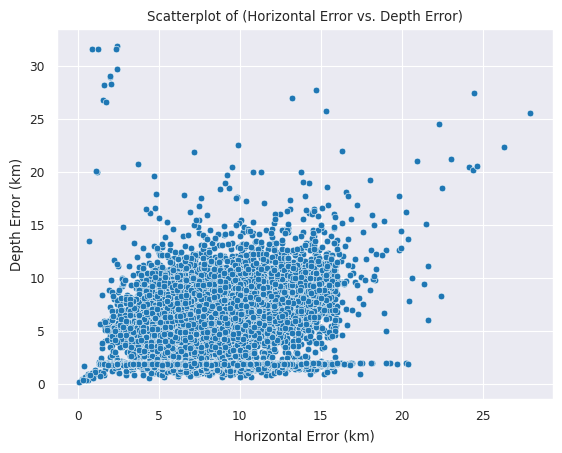

In [22]:
sns.scatterplot(x='horizontalError', y='depthError', data=visulization_df)

# Add labels and title to the scatterplot
plt.xlabel('Horizontal Error (km)')
plt.ylabel('Depth Error (km)')
plt.title('Scatterplot of (Horizontal Error vs. Depth Error)')



# Show the plot
plt.show()



                            OLS Regression Results                            
Dep. Variable:        horizontalError   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     711.7
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          1.62e-153
Time:                        11:57:12   Log-Likelihood:                -41650.
No. Observations:               16357   AIC:                         8.330e+04
Df Residuals:                   16355   BIC:                         8.332e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5923      0.041    183.245      0.0

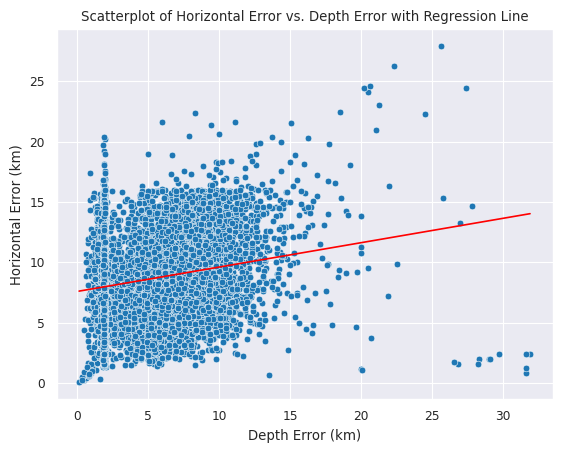

In [23]:
# Fit a linear regression model to the data
model = smf.ols('horizontalError ~ depthError', data=visulization_df).fit()

# Print a summary of the regression results
print(model.summary())

# Create a scatterplot of the horizontal error versus the depth error
sns.scatterplot(x='depthError', y='horizontalError', data=visulization_df)

# Add a regression line to the scatterplot
sns.lineplot(x='depthError', y=model.predict(), data=visulization_df, color='red')

# Add labels and title to the scatterplot
plt.xlabel('Depth Error (km)')
plt.ylabel('Horizontal Error (km)')
plt.title('Scatterplot of Horizontal Error vs. Depth Error with Regression Line')

# Show the plot
plt.show()


<a id="6"></a> <br>
# Earthquake Hotspot

In [24]:
import plotly.express as px
import pandas as pd

# Load earthquake data

# Filter the data to include only earthquakes with magnitude greater than 5.5

visulization_df_more_than_6 = visulization_df[visulization_df["mag"] > 6]

# Create a Plotly Scattergeo map
fig = px.scatter_geo(visulization_df_more_than_6, lat='latitude', lon='longitude', 
                     color='mag', size='mag', hover_name='place',
                     size_max=10, projection='natural earth', title='Earthquake Hotspots')

# Show the map
fig.show()


<a id="7"></a> <br>
# HeatMap by Magnitude

In [25]:
# Find the location with the highest magnitude of earthquakes
max_mag = visulization_df['mag'].max()
max_mag_index = visulization_df[visulization_df['mag'] == max_mag].index[0]
max_mag_latitude = visulization_df.loc[max_mag_index, 'latitude']
max_mag_longitude = visulization_df.loc[max_mag_index, 'longitude']

# Create a base map centered on the location with the highest magnitude
m = folium.Map(location=[max_mag_latitude, max_mag_longitude], tiles='cartodbpositron', zoom_start=5)


# Filter out earthquakes with magnitude 6
df_quakes = visulization_df[visulization_df['mag'] > 6]

# Add a heatmap of earthquakes to the map
heatmap = plugins.HeatMap(data=df_quakes[['latitude', 'longitude']].values.tolist(), radius=15)
heatmap.add_to(m)

# Display the map
m


<a id="8"></a> <br>
# Source distribution

In [26]:
from folium.plugins import MarkerCluster

# Create a base map
m = folium.Map(location=[45.5236, -122.6750], tiles='cartodbpositron', zoom_start=1)

# Filter out earthquakes with magnitude 6
df_quakes = visulization_df[visulization_df['mag'] > 6]

# Define the colors for the markers based on magnitude
colors = {
    6: 'green',
    7: 'yellow',
    8: 'orange',
    9: 'red'
}

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Add markers for earthquakes to the MarkerCluster object
for lat, lon, mag in zip(df_quakes['latitude'], df_quakes['longitude'], df_quakes['mag']):
    # Define the color of the marker based on magnitude
    color = colors.get(int(mag), 'blue')
    # Create the marker with the custom color and a tooltip showing the magnitude
    folium.Marker([lat, lon], icon=folium.Icon(color=color), tooltip=f"Magnitude: {mag:.1f}").add_to(marker_cluster)

# Add a legend to the map
legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 200px; height: 150px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                  background-image: url('https://th.bing.com/th/id/R.cf2922b9c74a11dd76146e2171397e59?rik=DraFhPTppE48LQ&riu=http%3a%2f%2fwonderfulengineering.com%2fwp-content%2fuploads%2f2016%2f01%2fblack-wallpaper-3.jpg&ehk=By%2fOyu69UBtmC8dDgg6mIgYH0qZeo7Fhtj%2bmQnue9pM%3d&risl=&pid=ImgRaw&r=0');
                 background-repeat: no-repeat;
                 background-size: 100% 100%;
                 ">
     <p style="padding-left: 10px; font-weight:bold; color:white">Magnitude</p>
     <p style="padding-left: 30px; color:green">6 - 6.9</p>
     <p style="padding-left: 30px; color:yellow">7 - 7.9</p>
     <p style="padding-left: 30px; color:orange">8 - 8.9</p>
     <p style="padding-left: 30px; color:red">9+</p>
     </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m

<a id="9"></a> <br>
# Top 10 places where most earthquake happend

* The resulting map shows markers for each of the top 10 places, with the size and color of the markers indicating the number of earthquakes in each place. Places with more than 500 earthquakes are represented by red circles, while places with between 300 and 500 earthquakes are represented by dark purple markers, and places with fewer than 300 earthquakes are represented by beige markers.

In [27]:
# Group the data by place and count the number of earthquakes in each place
place_counts = visulization_df.groupby('place').count()['mag']

# Get the top 10 places with the most earthquakes
top_places = place_counts.sort_values(ascending=False).head(10)

# Create a base map centered on the first place in the top 10 list
m = folium.Map(location=[visulization_df.loc[df['place'] == top_places.index[0], 'latitude'].values[0], 
                        visulization_df.loc[visulization_df['place'] == top_places.index[0], 'longitude'].values[0]], 
               tiles='cartodbpositron', zoom_start=2)

# Add markers to the map for the top 10 places
for place in top_places.index:
    location = [visulization_df.loc[visulization_df['place'] == place, 'latitude'].values[0], visulization_df.loc[visulization_df['place'] == place, 'longitude'].values[0]]
    
    # Set the marker color based on the number of earthquakes in the place
    if top_places[place] > 500:
        folium.CircleMarker(location, 
                        radius=top_places[place]/5, 
                        popup=f'<b>{place}</b><br>{top_places[place]} earthquakes', 
                        fill=True, 
                        color='red', 
                        fill_color='red', 
                        fill_opacity=0.5).add_to(m)
    
    elif top_places[place] > 300:
        color = 'darkpurple'
        folium.Marker(location, 
                      popup=f'<b>{place}</b><br>{top_places[place]} earthquakes', 
                      icon=folium.Icon(color=color, icon='info-sign')
                      ).add_to(m)
        
    else:
        color = 'beige'
        folium.Marker(location, 
                      popup=f'<b>{place}</b><br>{top_places[place]} earthquakes', 
                      icon=folium.Icon(color=color, icon='info-sign')
                      ).add_to(m)

# Show the map
m

<a id="10"></a> <br>
# Yesturday magnitude scalling of earthquake

<div style="text-align:center;">
<img src="https://sciencemadefun.net/blog/wp-content/uploads/2021/04/AdobeStock_198314789-scaled.jpeg" alt="death Note" style="width:700px;height:400px;">
</div>


In [28]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
# Load earthquake data
df = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.csv')

# Create a subplot with a world map
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'geo'}]])

# Define colors for each magnitude range
colors = ['#ca0020', '#f4a582', '#92c5de','#0571b0']

# Create a list of traces for each magnitude range
traces = []
for i, mag_range in enumerate([[1, 2],[3, 4], [5, 7], [8, 10]]):
    # Filter the earthquakes in the current magnitude range
    df_mag = df[(df['mag'] >= mag_range[0]) & (df['mag'] < mag_range[1])]
    
    # Create a scattergeo trace for the current magnitude range
    trace = go.Scattergeo(
        lon=df_mag['longitude'],
        lat=df_mag['latitude'],
        mode='markers',
        marker=dict(
            color=colors[i],
            size=df_mag['mag']*5,
            opacity=0.5,
            sizemode='diameter',
            sizemin=1
        ),
        name='Magnitude {} - {}'.format(mag_range[0], mag_range[1]),
        visible=False,
        hoverinfo='text',
        text=df_mag['place']
    )
    traces.append(trace)

# Add the traces to the figure
fig.add_traces(traces)

# Set the first trace to be visible
fig.data[0].visible = True

# Add a slider to the chart to control the animation
steps = []
for i in range(len(traces)):
    if traces[i]['name'] == 'Magnitude 1 - 2':
        mag_label = 'micro'
    elif traces[i]['name'] == 'Magnitude 3 - 4':
        mag_label = 'minor'
    elif traces[i]['name'] == 'Magnitude 5 - 7':
        mag_label = 'strong'
    elif traces[i]['name'] == 'Magnitude 8 - 10':
        mag_label = 'major'
    
    step = dict(
        method="update",
        args=[{"visible": [False] * len(traces)},
              {"title": "Earthquakes in the last day - {} magnitude earthquakes".format(mag_label.capitalize())}],
        label=mag_label
    )
    step["args"][0]["visible"][i] = True
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Magnitude range: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    showlegend=True,
    legend=dict(
        x=0.025,
        y=0.98
    ),
    geo=dict(
        resolution=50,
        showcoastlines=True,
        showland=True,
        landcolor='rgb(204, 204, 204)',
        countrycolor='rgb(204, 204, 204)',
        coastlinecolor='rgb(204, 204, 204)',
        projection_type='equirectangular'
    ),
    height=800,
    title='Earthquakes in the last day - Magnitude 0-10',
    sliders=sliders
)

fig.show()

In [29]:


# The link to the Canva design to be embedded
canva_link = "https://www.canva.com/design/DAFazsgt4So/view"

# The HTML code to embed the Canva design
html_code = f'''
<div style="position: relative; width: 100%; height: 0; padding-top: 56.2500%;
             padding-bottom: 0; box-shadow: 0 2px 8px 0 rgba(63,69,81,0.16); margin-top: 1.6em; margin-bottom: 0.9em; 
             overflow: hidden; border-radius: 8px; will-change: transform;">
    <iframe loading="lazy" style="position: absolute; width: 100%; height: 100%; top: 0; left: 0; border: none; padding: 0;margin: 0;"
            src="{canva_link}?embed" allowfullscreen="allowfullscreen" allow="fullscreen">
    </iframe>
</div>
<a href="{canva_link}?utm_content=DAFazsgt4So&amp;utm_campaign=designshare&amp;utm_medium=embeds&amp;utm_source=link" target="_blank" rel="noopener"></a> by Henil
'''

# Display the Canva design in the notebook
HTML(html_code)
